In [5]:
import numpy as np
import pandas as pd
import matplotlib as plt

df1= pd.read_csv("Bentley_et_al_2016_expression.csv")
df1.drop(df1.columns[[3,4]], axis=1, inplace=True)


df2= pd.read_csv("Modified celegans db dump.csv")
df2.drop(df2.columns[[3,4]], axis=1, inplace=True)

In [7]:
df3= (df1.merge(df2, on=list(df1.columns), indicator=True, how='outer')
    .query('_merge != "both"')
    .replace({'_merge': {'left_only': 'Entity1', 'right_only': 'Entity2'}})
    .rename(columns={'_merge': 'Entity1/Entity2'})
)

df4 = df3[df3['Entity1/Entity2'] == "Entity1"]

df5= df3[df3['Entity1/Entity2'] == "Entity2"]

In [8]:
display (df4)

display (df5)

,Entity1,Relationship,Entity2,Entity1/Entity2
6,ADEL,Receptor,OCTR-1,Entity1
12,ADER,Receptor,OCTR-1,Entity1
14,ADFL,Neuropeptide,FLP-21,Entity1
18,ADFL,Receptor,NPR-2,Entity1
20,ADFL,Receptor,NTR-1,Entity1
...,...,...,...,...
1219,VD9,Neuropeptide,FLP-11,Entity1
1220,VD9,Neuropeptide,NTC-1,Entity1
1221,VD9,Receptor,DOP-3,Entity1
1222,VD9,Receptor,MOD-1,Entity1


,Entity1,Relationship,Entity2,Entity1/Entity2
1225,ADAL,Neurotransmitter,Glutamate,Entity2
1226,ADAL,Neuropeptide,FLP-8,Entity2
1227,ADAL,Innexin,INX-4,Entity2
1228,ADAL,Innexin,INX-19,Entity2
1229,ADAL,Innexin,UNC-9,Entity2
...,...,...,...,...
3145,VD13,Neurotransmitter,GABA,Entity2
3146,VD13,Innexin,INX-3,Entity2
3147,VD13,Innexin,INX-14,Entity2
3148,VD13,Innexin,UNC-9,Entity2


<Axes: xlabel='Entity1'>

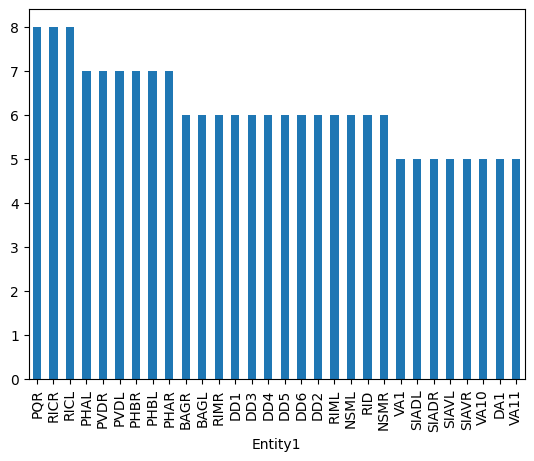

In [15]:
df4["Entity1"].value_counts().head(30).plot(kind="bar")

<Axes: xlabel='Entity2'>

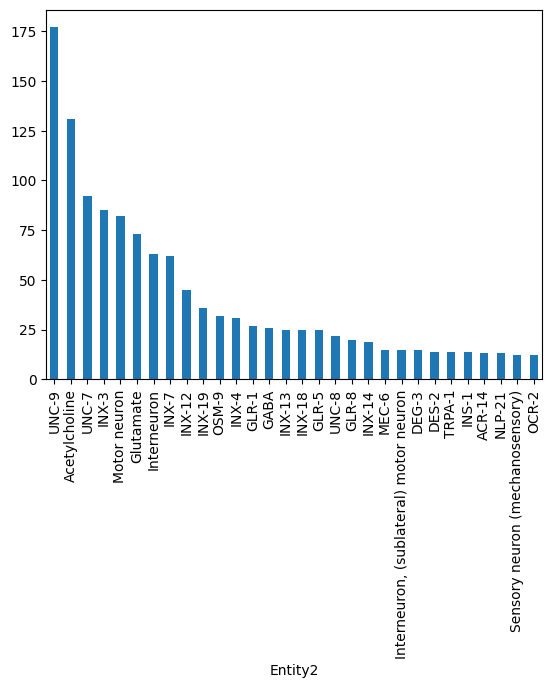

In [16]:
df5["Entity2"].value_counts().head(30).plot(kind="bar")